## LBVAR Noninformative

In [1]:
# 설치 없이 상태경로로 모듈을 가져오는 부분입니다
import sys
import os
parent_dir = os.path.abspath("../")
sys.path.append(parent_dir)

import bok_da

In [2]:
import pandas as pd
import numpy as np

In [3]:
# # large 데이터 로드
df = pd.read_excel("data/IRF_Korea_Data.xlsx", index_col=0)

# 컬럼에 로그 (call 제외)
df["CPI"] = np.log(df["CPI"])
df["GDP"] = np.log(df["GDP"])
df["Tax"] = np.log(df["Tax"])
df["Government_Spending"] = np.log(df["Government_Spending"])

df.head()

,Call,CPI,GDP,Tax,Government_Spending
Quarter,,,,,
2000-03-01,4.981847,4.136761,15.364991,13.581872,13.525739
2000-06-01,5.036268,4.134161,15.379946,13.444135,13.548638
2000-09-01,5.127937,4.149379,15.403475,13.490926,13.613575
2000-12-01,5.356287,4.161732,15.390611,13.191486,13.568085
2001-03-01,5.167332,4.172898,15.406336,13.549552,13.613650


In [4]:
model = bok_da.LBVAR_Noninformative(p=4, ndraws=10000, verbose=True)

> Initializing Model...
  - Trend: 1
  - p(lag): 4
  - Number of Draws: 10000
  - Verbose: True


In [5]:
model.fit(df)

> Posterior Draw (Non-informative Prior)


100%|██████████| 10000/10000 [00:02<00:00, 4149.20it/s]


In [6]:
model.Draw.variable_summary()

added | variable  | type    |   size(KB) | info
----------------------------------------------------
    1 | Sigma     | ndarray |   1953.266 | shape=(5, 5, 10000)
    2 | Bet       | ndarray |   8203.266 | shape=(5, 21, 10000)
    3 | Bet_Prime | ndarray |   8203.266 | shape=(21, 5, 10000)
    4 | U_B       | ndarray |  35937.641 | shape=(92, 5, 10000)


In [7]:
model.recursive_irf()

> Impulse Response Calculating...


2/2: 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]


> Forecast error variance decomposition Calculating...


4/4: 100%|██████████| 10000/10000 [00:00<00:00, 32455.87it/s]


> Historical Decomposition Calculating...


3/3: 100%|██████████| 10000/10000 [01:11<00:00, 139.17it/s]


> Done.


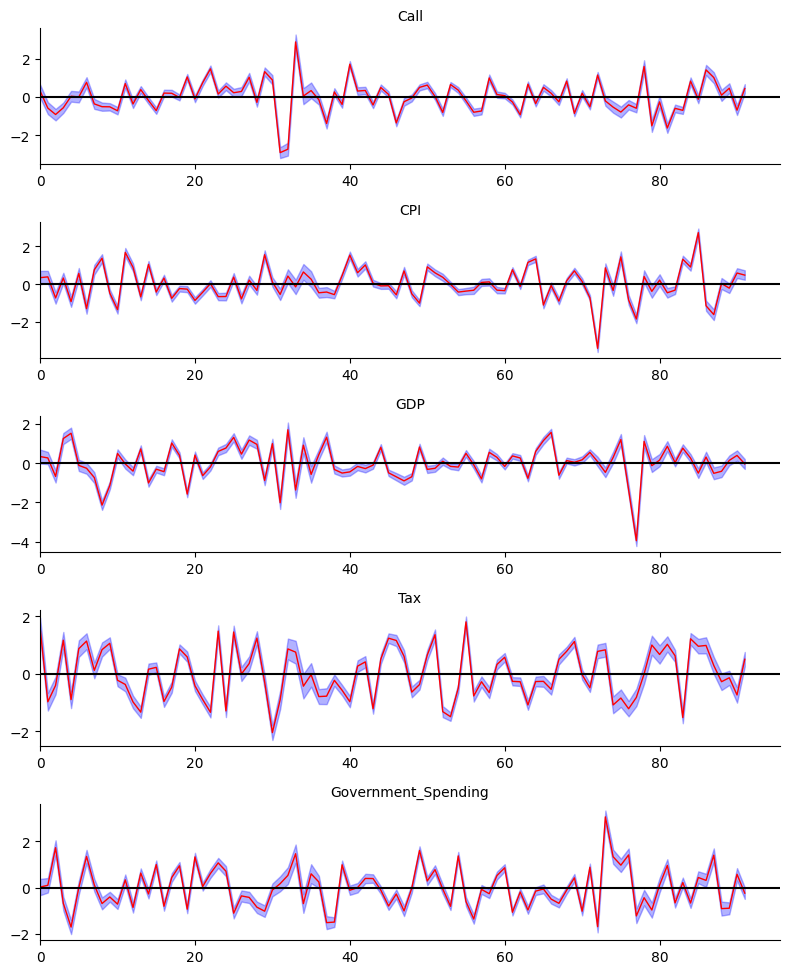

In [8]:
model.plot_irf_shock_series(df.columns)

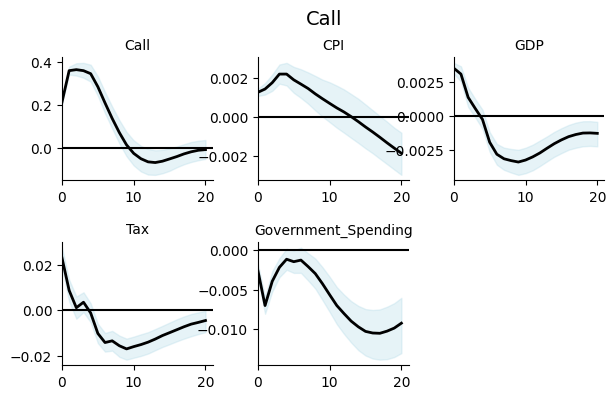

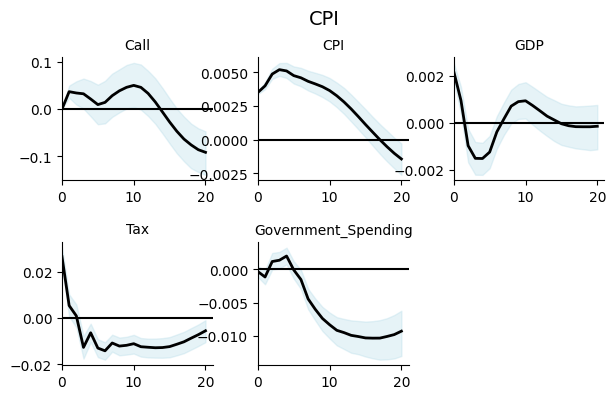

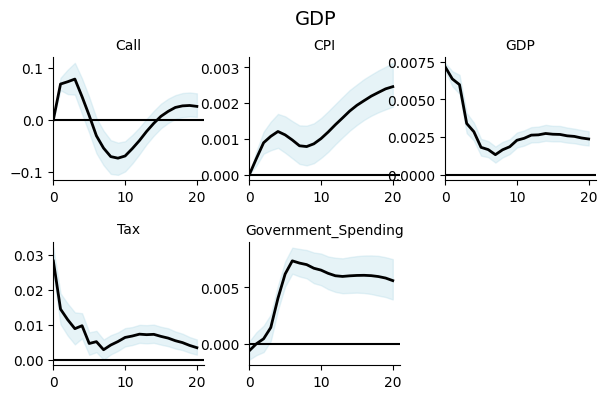

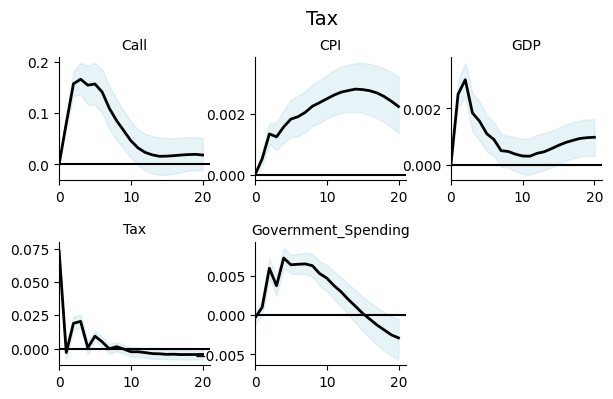

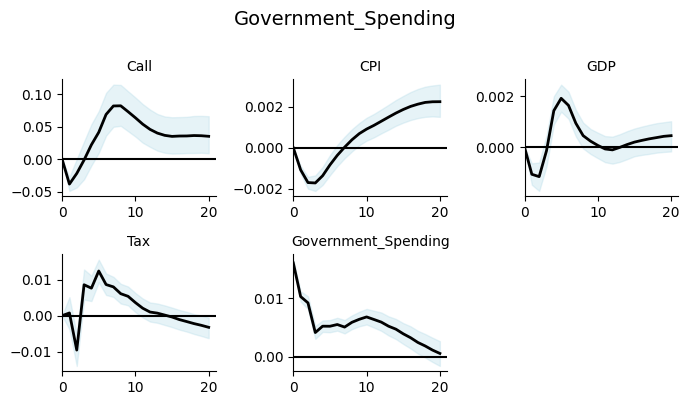

In [9]:
model.plot_irf_impulse_response(df.columns)

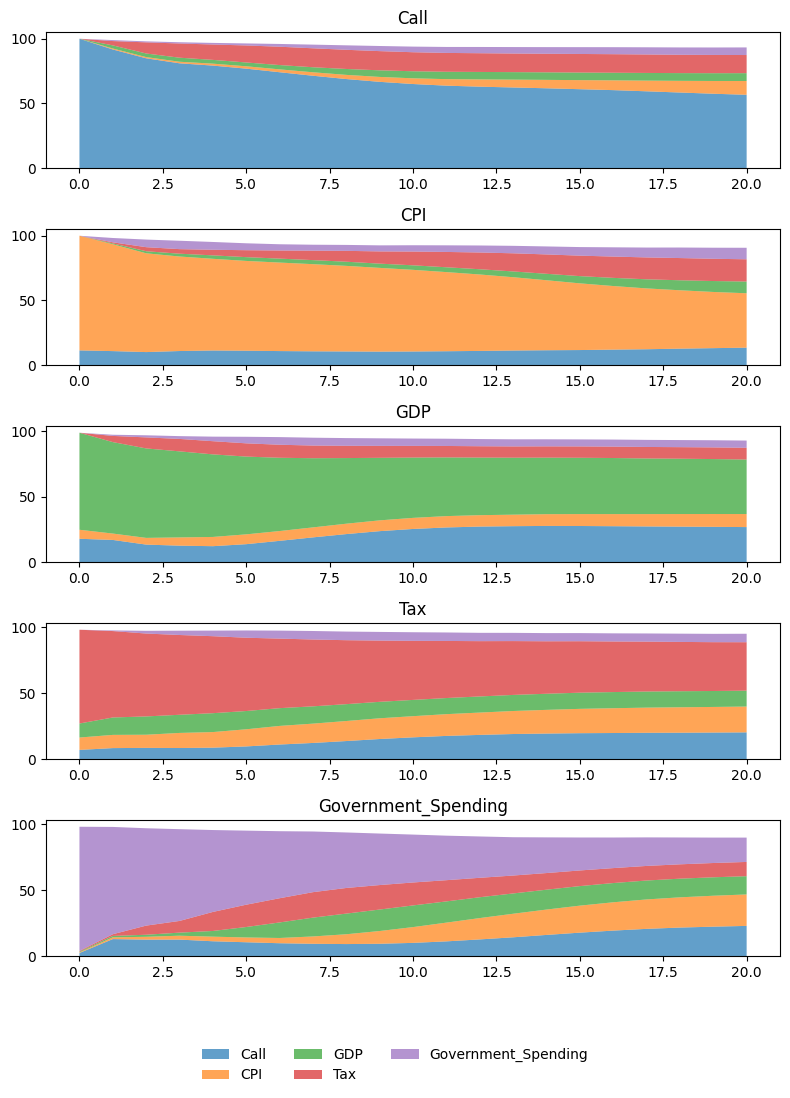

In [10]:
model.plot_irf_FEVD(df.columns)

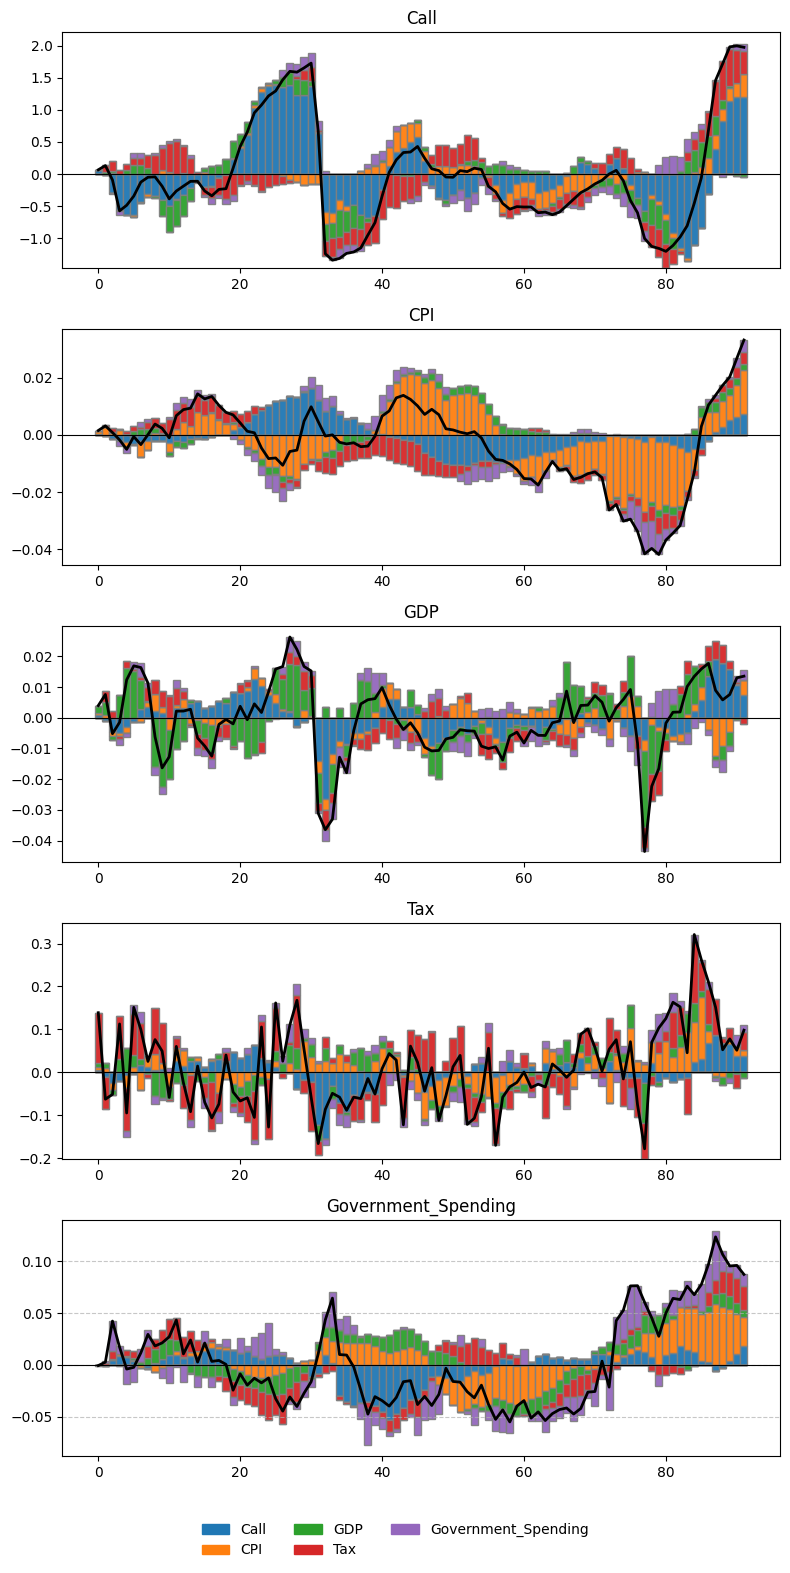

In [11]:
model.plot_irf_historical_decomposition(df.columns)